In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the integrated data
file_path = '../data/processed/integrated_data.csv'
try:
    data = pd.read_csv(file_path)
    print("Integrated data loaded successfully.")
    print(data.info())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it was created in the previous step.")

Integrated data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  17 non-null     int64  
 1   Country               17 non-null     object 
 2   Production            17 non-null     float64
 3   AverageTemperature    17 non-null     float64
 4   Global_CO2_Emissions  17 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 812.0+ bytes
None


In [2]:
# Drop any rows with missing values that might have been created during merging
# This is a good final cleaning step before modeling
data.dropna(inplace=True)

# Select the features and the target
features = ['AverageTemperature', 'Global_CO2_Emissions']
target = 'Production'

X = data[features]
y = data[target]

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (17, 2)
Target (y) shape: (17,)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (13, 2)
Testing set size: (4, 2)


In [4]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("\nModel training complete.")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")


Model training complete.
Model coefficients: [7.81800309e+08 1.97276219e+13]
Model intercept: -1972774183918475.2



Mean Squared Error (MSE): 14406336682970802176.00
R-squared (R2) score: -0.71


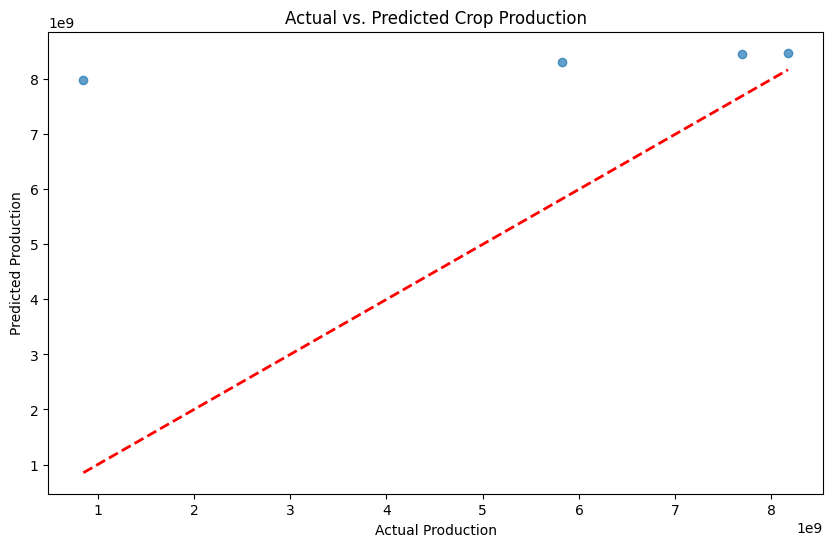

In [5]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Crop Production')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.show()